# Entrelazamiento

Como recordatorio, el entrelazamiento es una propiedad cuantica de la materia que se interpreta como dos o mas particulas tienen estados correlacionados.

En terminos practicos, esto implica, que si tenemos dos cubits, cuando hacemos una medicion en alguno de ellos, podemos determinar el estado en el que encontraremos el segundo cubit, incluso antes de ejecutar una medicion.

En el Notebook de Superposicion, teniamos un sistema de un cubit al que poniamos en superposicion y por lo tanto, un 50/50 de probabilidad de encontrarlo en uno de los dos estados, |0> o |1>.

Ahora, si ese mismo cubit estuviera *entrelazado* con otro cubit y ejecutaramos una medicion en alguno de esos cubits, la medicion arrojaria |0> o |1>. Sin embargo, si ejecutaramos una medicion en el segundo cubit (al mismo tiempo o no), el resultado de dicha medicion seria el mismo que arrojo la primera medicion.

En las siguientes lineas de codigo, vamos a explorar los resultados que obtenemos cuando los cubits estan entrelazados o no.

In [11]:
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit import QuantumCircuit
from qiskit import Aer, execute

In [5]:
# Primero creamos un circuito con dos cubits, los ponemos en
# superposicion y despues ejecutamos una medicion.

qc = QuantumCircuit(2,2) # creamos un circuito con 2 cubits y 2 bits clasicos

# Añadimos una compuerta de Hadamard a cada uno
qc.h(0)
qc.h(1)

In [8]:
# Ejecutamos una medicion y asignamos el resultado a los bits clasicos
qc.measure([0,1],[0,1])

In [7]:
qc.draw()

┌───┐┌─┐   
q_0: ┤ H ├┤M├───
     ├───┤└╥┘┌─┐
q_1: ┤ H ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1

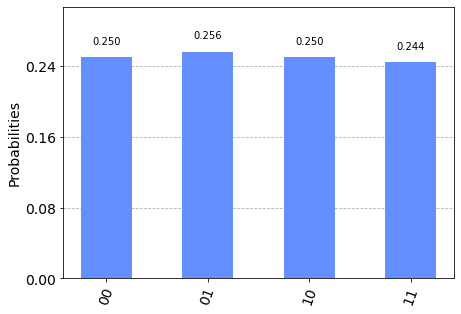

In [12]:
# Ejecutamos el circuito e imprimimos los resultados
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1000).result()
counts = result.get_counts(qc)
plot_histogram(counts)

Entonces, para el caso en el que los cubits no estan entrelazados, observamos los 4 posibles estados de nuestro sistema con probabilidades muy similares que deberian ser muy cercanas al 25%.

Ahora vamos a explorar los resultados que obtenemos cuando entrelazamos nuestros cubits, mediante la compuerta de **Control-NOT (CNOT)**.

La compuerta de **CNOT** es una compuerta que opera sistemas de cubits multiples. Esta compuerta opera en un cubit basado en el valor de un segundo cubit. Dentro de la terminologia de computacion cuantica, nos referimos a estos cubits como el cubit de **control** y el **target**.

La compuerta de **CNOT** entonces actua de manera en la que cuando un cubit esta conectado en forml de control y su valor es 0, el valor del cubit Target no va a cambiar. Sin embargo, si el valor del cubit de control es 1, una rotacion de 180 grados sobre el eje X sera aplicada al cubit target. 

| Ante s de CNOT |        | Despues de CNOT |         |
|----------------|--------|-----------------|---------|
| Control        | Target | Control         | Target |
| \|0>           | \|0>   | \|0>            | \|0>    |
| \|0>           | \|1>   | \|0>            | \|1>    |
| \|1>           | \|0>   | \|1>            | \|1>    |
| \|1>           | \|1>   | \|1>            | \|0>    |

In [13]:
# Ahora vamos a crear un sistema entrelazado
# Empezamos por crear un circuito con 2 cubits y 2 bits clasicos
qc = QuantumCircuit(2,2)
# Añadimos una compuerta H solo al primer cubit
qc.h(0)
# Añadimos una ompuerta tipo CNOT para entrelazar los dos cubits.
# Aqui, el primer cubit (0) es el control y el segundo (1) es el target.
qc.cx(0,1)
#Añadimos un operador de medicion y asignamos los resultados a 
# los bits clasicos
qc.measure([0,1],[0,1])

qc.draw()



┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

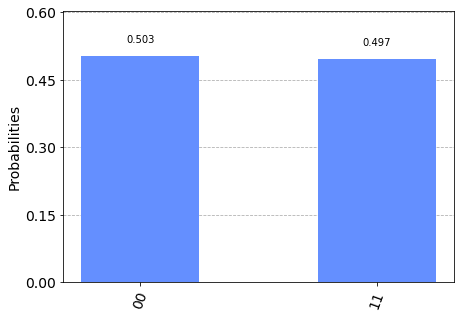

In [14]:
# Ahora ejecutamos el experimento e imprimimos los resultados
result = execute(qc, backend, shots=1000).result()
counts = result.get_counts(qc)
plot_histogram(counts)

Y aqui, observamos dos principios basicos de la mecanica cuantica, la superposicion de los cubits, en los estados 0 y 1,  el entrelazamiento - donde los resultados de medir dos cubits estan correlacionados, de manera que solo observamos los estados 00 o 11.